In [1]:
from method.perceptron import Perceptron
from dataset import IrisDataset
from config import LINK_DATA_IRIS
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get data

In [2]:
iris_ds = IrisDataset(link = LINK_DATA_IRIS, lst_filter_feature=[1,2])
iris_ds.train_df.head()

Size train have 70 records
Size test have 30 records


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
32,33,5.2,4.1,1.5,0.1,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
12,13,4.8,3.0,1.4,0.1,Iris-setosa
101,102,5.8,2.7,5.1,1.9,Iris-virginica


# Prepare data

In [3]:
# y = iris_ds.train_df.iloc[:,5].values
# y = np.where(y == 'Iris-virginica', -1, 1)
# y
y = iris_ds.y_train
y

array([ 1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,
       -1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1, -1,
        1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1,
        1,  1])

In [4]:
len(iris_ds.train_df)

70

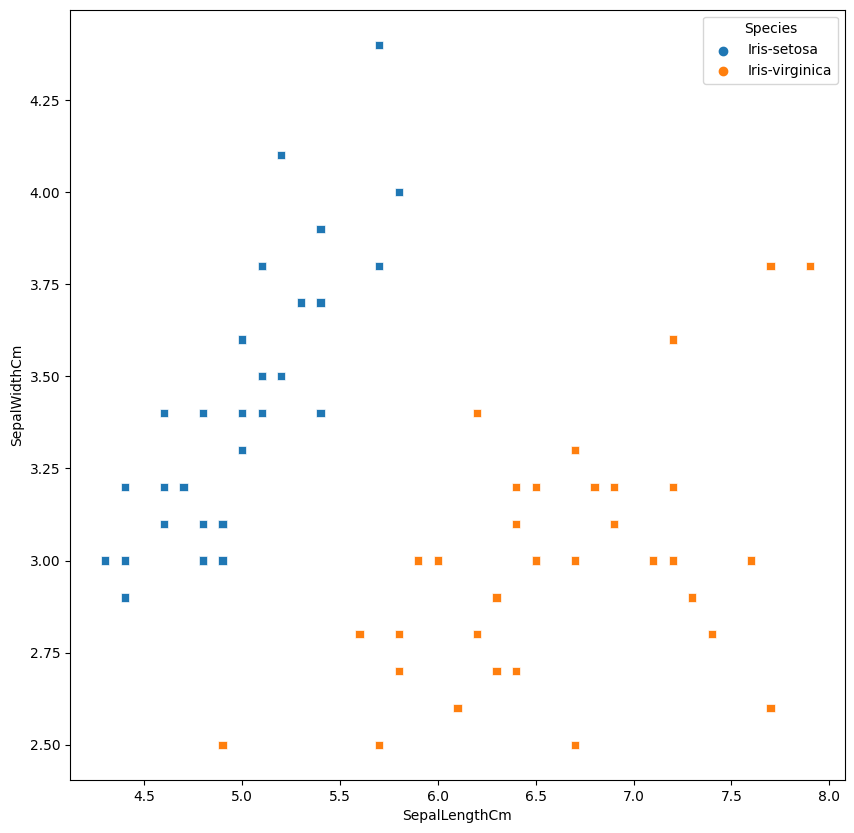

In [5]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data = iris_ds.train_df,marker='s', hue='Species')
# x.savefig("SepalLengthCm_vs_SepalWidthCm.png")
plt.savefig("SepalLengthCm_vs_SepalWidthCm.png")
plt.show()


In [6]:
sum(y)

-4

In [7]:
is_iris_versicolor = y==1
is_iris_versicolor

array([ True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False,  True,  True,  True,  True,  True,  True, False, False,
        True, False,  True, False, False, False, False,  True, False,
       False, False, False, False,  True,  True,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True, False,  True,  True, False, False, False,
        True,  True, False, False, False,  True,  True])

In [8]:
~is_iris_versicolor

array([False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True, False, False, False, False, False, False,  True,  True,
       False,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
        True,  True, False,  True, False, False,  True,  True,  True,
       False, False,  True,  True,  True, False, False])

## Feature

In [4]:
# X = iris_ds.train_df.iloc[:, [1, 3]].values
X = iris_ds.X_train

In [5]:
X.shape

(70, 2)

In [11]:
x_versicolor = X[:, 0]*is_iris_versicolor
x_versicolor = x_versicolor[x_versicolor>0.]
x_versicolor

array([5.2, 4.6, 4.6, 4.8, 4.4, 5.1, 5.1, 5.7, 5.1, 4.4, 4.8, 5.1, 4.8,
       5.1, 5.1, 4.6, 5. , 5. , 4.3, 4.9, 5.4, 5. , 5.2, 4.7, 4.9, 5.4,
       5.7, 4.9, 5.8, 5.4, 5.3, 4.8, 4.4])

In [12]:
y_versicolor = X[:, 1]*is_iris_versicolor
y_versicolor = y_versicolor[y_versicolor>0.]
y_versicolor

array([4.1, 3.4, 3.1, 3. , 3.2, 3.5, 3.5, 3.8, 3.8, 3. , 3. , 3.4, 3.1,
       3.8, 3.8, 3.2, 3.3, 3.4, 3. , 3. , 3.4, 3.6, 3.5, 3.2, 3.1, 3.9,
       4.4, 3.1, 4. , 3.7, 3.7, 3.4, 2.9])

In [13]:
x_iris_virginica = X[:, 0]*~is_iris_versicolor
x_iris_virginica = x_iris_virginica[x_iris_virginica>0.]
x_iris_virginica

array([5.8, 6.1, 6.3, 5.8, 6.5, 7.7, 7.2, 6.7, 7.3, 6.2, 5.9, 6.8, 5.7,
       6.9, 6.7, 5.6, 4.9, 7.4, 6.9, 6. , 7.9, 7.6, 6.9, 6.4, 6.4, 6.5,
       7.2, 6.7, 6.7, 6.5, 6.2, 6.5, 6.3, 7.1, 7.2, 6.4, 7.7])

In [14]:
y_iris_virginica = X[:, 1]*~is_iris_versicolor
y_iris_virginica = y_iris_virginica[y_iris_virginica>0.]
y_iris_virginica

array([2.7, 2.6, 2.7, 2.8, 3. , 2.6, 3.2, 3.3, 2.9, 2.8, 3. , 3.2, 2.5,
       3.2, 3.3, 2.8, 2.5, 2.8, 3.1, 3. , 3.8, 3. , 3.1, 2.7, 3.2, 3. ,
       3.6, 3. , 2.5, 3.2, 3.4, 3. , 2.9, 3. , 3. , 3.1, 3.8])

In [ ]:
# plot data

plt.scatter(x_versicolor,y_versicolor,
            color='red', marker='o', label='versicolor')
plt.scatter(x_iris_virginica, y_iris_virginica,
            color='blue', marker='x', label='virginica')
            
plt.xlabel('SepalLengthCm [cm]')
plt.ylabel('SepalWidthCm [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

In [ ]:
ppn = Perceptron(eta=0.1, n_iter=1000)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

In [27]:
class Perceptron(object):
    def __init__(self, learning_rate=0.01, n_epoch=50, random_state=100):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        for _ in range(self.n_epoch): # Duyệt qua các EPOCH
            for xi, target in zip(X, y): # Duyệt qua từng điểm dữ liệu
                wTx = self.forward(xi) # Tính giá trị 
                partial = -(target- np.tanh(wTx))*(1- np.tanh(wTx)**2)*xi
                self.w_ -= self.learning_rate * partial
        return self

    def forward(self, X):
        z = np.dot(X,self.w_)
        return z

    def predict(self, X):
        return np.where(self.forward(X) >= 0, 1, -1)

In [28]:
from matplotlib.colors import ListedColormap
from dataset import IrisDataset
from config import LINK_DATA_IRIS
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from method.perceptron import Perceptron

iris_ds = IrisDataset(link = LINK_DATA_IRIS, lst_filter_feature=[1,2,3,4])
X = iris_ds.X_train
X = np.insert(X,obj=0, values= 1, axis=1)
y = iris_ds.y_train

ppn = Perceptron(learning_rate= 0.1, n_epoch=1000)
ppn.fit(X, y)
print(f"Weights: {ppn.w_}")

Size train have 70 records
Size test have 30 records
Weights: [ 0.21841758  0.45288138  1.02199607 -1.5342175  -0.7997749 ]


In [8]:
# def predict(X: list, theta)-> int:
#     value = theta[0]
#     for p, x in zip(X, theta[1:]): # biến tự do ở đầu
#         value+= p*x
#     return int(np.sign(value))

In [5]:
# X_test = np.insert(iris_ds.X_test, obj= 0, values= 1, axis= 1)
# preds = [ppn.predict(X[idx]) for idx in range(len(X))]
# print(f"Top 10 kết quả dự đoán: {preds[:10]}")

Top 10 kết quả dự đoán: [array(1), array(1), array(1), array(1), array(-1), array(-1), array(-1), array(-1), array(-1), array(-1)]


In [30]:
from sklearn.metrics import f1_score
X_test = np.insert(iris_ds.X_test, obj= 0, values= 1, axis= 1)
preds = ppn.predict(X_test)
print(f"Top 10 predictions: {preds[:10]}")
labels  = iris_ds.y_test
print(f"Top 10 ground truth labels : {labels[:10]}")
print(f"F1-score: {f1_score(y_true= labels, y_pred= preds)}")

Top 10 predictions: [ 1 -1  1  1  1  1  1  1 -1  1]
Top 10 ground truth labels : [ 1 -1  1  1  1  1  1  1 -1  1]
F1-score: 1.0


In [42]:
ppn.w_

array([[ 0.92870357],
       [-0.67841408],
       [ 0.93608343]])

In [ ]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('SepalLengthCm [cm]')
plt.ylabel('SepalWidthCm [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()